# Consumer Price Index

This dataset is taken from the [MS Azure open datasets](https://azure.microsoft.com/en-us/services/open-datasets/catalog/). Again, this data is too big for one csv file to be uploaded, so refer to the homepage of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#from azureml.opendatasets import UsLaborCPI
#usLaborCPI = UsLaborCPI()
#usLaborCPI_df = usLaborCPI.to_pandas_dataframe()
#usLaborCPI_df.to_csv('USConsumerPriceIndex.csv')

In [3]:
data_all = pd.read_csv('USConsumerPriceIndex.csv')
data_all.head(3)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,area_code,item_code,series_id,year,period,value,footnote_codes,seasonal,periodicity_code,series_title,item_name,area_name
0,S49E,SEHF01,CUURS49ESEHF01,2017,M12,279.974,NaN,U,R,"Electricity in San Diego-Carlsbad, CA, all urb...",Electricity,"San Diego-Carlsbad, CA"
1,S49E,SEHF01,CUURS49ESEHF01,2017,M12,279.974,NaN,U,R,"Electricity in San Diego-Carlsbad, CA, all urb...",Electricity,"San Diego-Carlsbad, CA"
2,S49E,SEHF01,CUURS49ESEHF01,2017,M12,279.974,NaN,U,R,"Electricity in San Diego-Carlsbad, CA, all urb...",Electricity,"San Diego-Carlsbad, CA"


In [4]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11668404 entries, 0 to 11668403
Data columns (total 12 columns):
area_code           object
item_code           object
series_id           object
year                int64
period              object
value               float64
footnote_codes      object
seasonal            object
periodicity_code    object
series_title        object
item_name           object
area_name           object
dtypes: float64(1), int64(1), object(10)
memory usage: 1.0+ GB


## Data Cleaning

- There are a lot of duplicates within the dataset which will be removed first.
- The column **footnote_codes** has no entries. We can remove that column.

In [5]:
data = data_all.drop_duplicates()
data = data.drop('footnote_codes', axis=1)

## What kind of period?

We can take a look at monthly, semi annual and annual data. For further steps, we try to take a look at annual data (S03).

In [6]:
data_seasonal = data[data['period']=='S03']

## What kind of regions?

The documentation tells us that we can check 58 regions. We choose four for comparison:
- San Diego-Carlsbad, CA (S49E)
- Dallas-Fort Worth-Arlington, TX (S37A)
- Chicago-Naperville-Elgin, IL-IN-WI (S23A)
- Miami-Fort Lauderdale-West Palm Beach, FL (S35B)

In [7]:
data_se_region = data_seasonal[(data_seasonal['area_code']=='S49E') | (data_seasonal['area_code']=='S37A') | (data_seasonal['area_code']=='S23A') | (data_seasonal['area_code']=='S35B')]
data_se_region

,area_code,item_code,series_id,year,period,value,seasonal,periodicity_code,series_title,item_name,area_name
264,S49E,SEHF01,CUUSS49ESEHF01,1997,S03,95.300,U,S,"Electricity in San Diego-Carlsbad, CA, all urb...",Electricity,"San Diego-Carlsbad, CA"
282,S49E,SEHF01,CUUSS49ESEHF01,1998,S03,85.700,U,S,"Electricity in San Diego-Carlsbad, CA, all urb...",Electricity,"San Diego-Carlsbad, CA"
300,S49E,SEHF01,CUUSS49ESEHF01,1999,S03,88.400,U,S,"Electricity in San Diego-Carlsbad, CA, all urb...",Electricity,"San Diego-Carlsbad, CA"
318,S49E,SEHF01,CUUSS49ESEHF01,2000,S03,114.100,U,S,"Electricity in San Diego-Carlsbad, CA, all urb...",Electricity,"San Diego-Carlsbad, CA"
336,S49E,SEHF01,CUUSS49ESEHF01,2001,S03,118.500,U,S,"Electricity in San Diego-Carlsbad, CA, all urb...",Electricity,"San Diego-Carlsbad, CA"
...,...,...,...,...,...,...,...,...,...,...,...
10221175,S35B,SA0L1E,CWUSS35BSA0L1E,2018,S03,270.619,U,S,All items less food and energy in Miami-Fort L...,All items less food and energy,"Miami-Fort Lauderdale-West Palm Beach, FL"
10224154,S35B,SETA01,CUUSS35BSETA01,2017,S03,227.384,U,S,New vehicles in Miami-Fort Lauderdale-West Pal...,New vehicles,"Miami-Fort Lauderdale-West Palm Beach, FL"
10224181,S35B,SETA01,CUUSS35BSETA01,2018,S03,228.580,U,S,New vehicles in Miami-Fort Lauderdale-West Pal...,New vehicles,"Miami-Fort Lauderdale-West Palm Beach, FL"
10224316,S35B,SETA01,CWUSS35BSETA01,2017,S03,224.961,U,S,New vehicles in Miami-Fort Lauderdale-West Pal...,New vehicles,"Miami-Fort Lauderdale-West Palm Beach, FL"


## What kind of items?

Let's take a look at all items of **Miami** to get an overview.

In [8]:
miami = data_se_region[data_se_region['area_code']=='S35B']
set(miami['item_name'].values)

{'Alcoholic beverages',
 'All items',
 'All items  less medical care',
 'All items - old base',
 'All items less energy',
 'All items less food and energy',
 'All items less shelter',
 'Apparel',
 'Cereals and bakery products',
 'Commodities',
 'Commodities less food',
 'Commodities less food and beverages',
 'Dairy and related products',
 'Durables',
 'Education and communication',
 'Education and communication commodities',
 'Education and communication services',
 'Electricity',
 'Energy',
 'Energy services',
 'Food',
 'Food and beverages',
 'Food at home',
 'Food away from home',
 'Fruits and vegetables',
 'Fuels and utilities',
 'Gasoline (all types)',
 'Gasoline, unleaded midgrade',
 'Gasoline, unleaded premium',
 'Gasoline, unleaded regular',
 'Household energy',
 'Household furnishings and operations',
 'Household furnishings and supplies',
 'Housing',
 'Meats, poultry, fish, and eggs',
 'Medical care',
 'Motor fuel',
 'Motor vehicle insurance',
 'New and used motor vehicles',


Concerning items, we will look at:
- Education and Communication
- Electricity
- Food
- Transportation

In [9]:
data_se_region_item = data_se_region[(data_se_region['item_name']=='Education and communication') | (data_se_region['item_name']=='Electricity') | (data_se_region['item_name']=='Food') | (data_se_region['item_name']=='Transportation')]

data_education = data_se_region_item[data_se_region_item['item_name']=='Education and communication']
data_electricity = data_se_region_item[data_se_region_item['item_name']=='Electricity']
data_food = data_se_region_item[data_se_region_item['item_name']=='Food']
data_transport = data_se_region_item[data_se_region_item['item_name']=='Transportation']

In [10]:
data_education

,area_code,item_code,series_id,year,period,value,seasonal,periodicity_code,series_title,item_name,area_name
56607,S49E,SAE,CWUSS49ESAE,1998,S03,99.000,U,S,Education and communication in San Diego-Carls...,Education and communication,"San Diego-Carlsbad, CA"
56634,S49E,SAE,CWUSS49ESAE,1999,S03,97.600,U,S,Education and communication in San Diego-Carls...,Education and communication,"San Diego-Carlsbad, CA"
56661,S49E,SAE,CWUSS49ESAE,2000,S03,98.200,U,S,Education and communication in San Diego-Carls...,Education and communication,"San Diego-Carlsbad, CA"
56688,S49E,SAE,CWUSS49ESAE,2001,S03,100.300,U,S,Education and communication in San Diego-Carls...,Education and communication,"San Diego-Carlsbad, CA"
56715,S49E,SAE,CWUSS49ESAE,2002,S03,102.000,U,S,Education and communication in San Diego-Carls...,Education and communication,"San Diego-Carlsbad, CA"
...,...,...,...,...,...,...,...,...,...,...,...
10202776,S35B,SAE,CWUSS35BSAE,2014,S03,124.022,U,S,Education and communication in Miami-Fort Laud...,Education and communication,"Miami-Fort Lauderdale-West Palm Beach, FL"
10202803,S35B,SAE,CWUSS35BSAE,2015,S03,125.631,U,S,Education and communication in Miami-Fort Laud...,Education and communication,"Miami-Fort Lauderdale-West Palm Beach, FL"
10202830,S35B,SAE,CWUSS35BSAE,2016,S03,124.126,U,S,Education and communication in Miami-Fort Laud...,Education and communication,"Miami-Fort Lauderdale-West Palm Beach, FL"
10202857,S35B,SAE,CWUSS35BSAE,2017,S03,116.146,U,S,Education and communication in Miami-Fort Laud...,Education and communication,"Miami-Fort Lauderdale-West Palm Beach, FL"


Let's try to group the values.

In [11]:
group_education = (data_education.groupby(['year', 'area_name'])['value'].mean()).to_frame().unstack()['value']
group_education

area_name,"Chicago-Naperville-Elgin, IL-IN-WI","Dallas-Fort Worth-Arlington, TX","Miami-Fort Lauderdale-West Palm Beach, FL","San Diego-Carlsbad, CA"
year,,,,
1998,104.7500,99.7500,100.7000,98.9000
1999,107.2500,103.6000,102.4500,97.5500
2000,110.7000,106.6000,103.4500,98.0500
2001,113.4500,109.9500,106.9000,100.0500
2002,116.8500,114.7500,105.8000,101.6000
2003,118.1000,117.9000,107.3000,102.9500
2004,119.1500,118.6000,108.4500,109.0000
2005,121.2000,120.2000,108.7500,111.9000
2006,123.7000,121.3000,110.6000,113.2000


The values do not tell us any unit or what they stand for. We can either take the absolute values or take the values from 1998 as the reference. Thus, I decided to keep it as it is.

In [12]:
group_elec = (data_electricity.groupby(['year', 'area_name'])['value'].mean()).to_frame().unstack()['value']
group_food = (data_food.groupby(['year', 'area_name'])['value'].mean()).to_frame().unstack()['value']
group_transport = (data_transport.groupby(['year', 'area_name'])['value'].mean()).to_frame().unstack()['value']

In [13]:
areas = group_education.columns.values
groups = [group_education, group_elec, group_food, group_transport]
types = ['Education and Communication', 'Electricity', 'Food', 'Transportation']

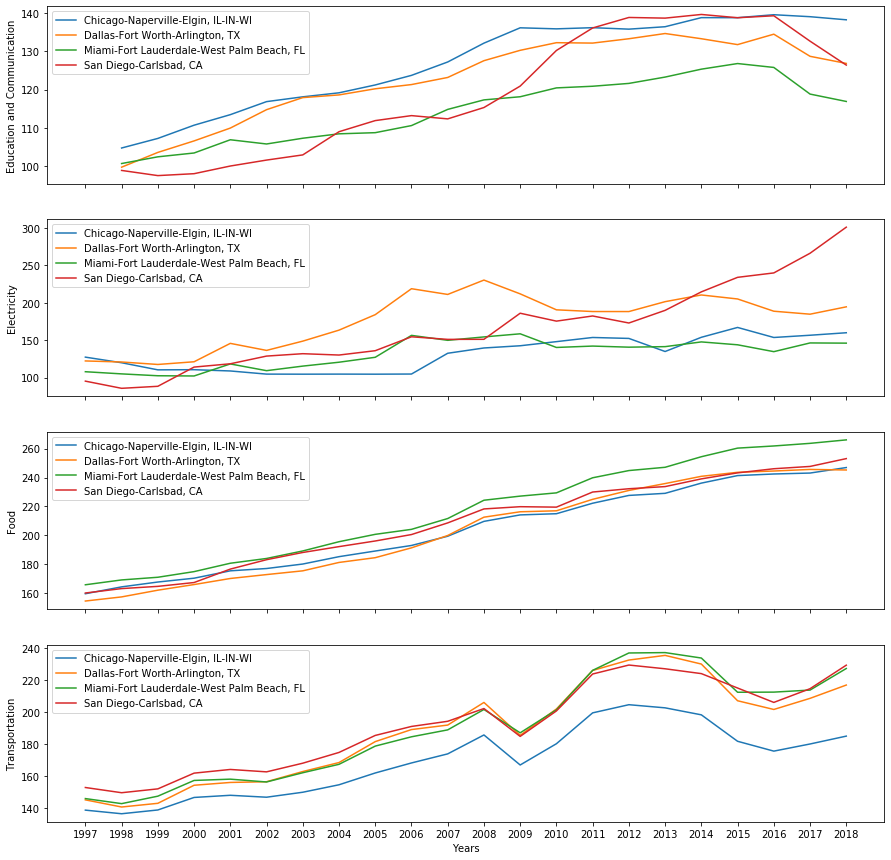

In [14]:
fig, axes = plt.subplots(4,1, figsize=(15,15), sharex=True)

# Try to loop over data for evaluation
for i in range(len(types)):
    ax = axes[i]
    ax.set_ylabel(types[i])
    for area in areas:
        ax.plot(groups[i].index.values, groups[i][area], label=area)
        ax.legend()

plt.xlabel('Years')
plt.xticks(np.arange(1997,2019))
plt.show()